# Resolución de problemas

## Ejercicio 1

$$\frac{dT}{dt} = -k\cdot(T-T_{amb})$$

### Resolución

$$\begin{split}
\int\frac{dT}{T-T_{amb}} &= \int-k\cdot dt \\
\ln{|T-T_{amb}|} &= -k\cdot t + C_1 \\
T-T_{amb} &= e^{-k\cdot t + C_1} \\
T(t) &= C_2\cdot e^{-k\cdot t} + T_{amb}
\end{split}$$

### Código

In [1]:
import sympy
import numpy as np 
import matplotlib.pyplot as plt
sympy.init_printing(use_latex='mathjax')

**Datos**

- ta = 21
- t = 0 $\rightarrow$ T(0) = 95
- t = 5 $\rightarrow$ T(5) = 80

In [2]:
# Definicion de VARIABLES
# k: Constante
# ta: Temperatura ambiente
# t: tiempo
k, ta, t = sympy.symbols('k ta t')

# Definimos la funcion y(t)
y = sympy.Function('y')(t)

# Definimos nuestra EDO
edo = sympy.Eq(y.diff(t), -k * (y - ta))

# Resolvemos la EDO con datos iniciales
solucion = sympy.dsolve(edo, y)

solucion

           -k⋅t     
y(t) = C₁⋅ℯ     + ta

In [3]:
# Resolvemos la EDO con datos iniciales
solucion = sympy.dsolve(edo, y, ics={y.subs(t, 0): 95})

solucion = solucion.subs(ta, 21)
solucion

                -k⋅t
y(t) = 21 + 74⋅ℯ    

In [4]:
# Devolver la parte derecha de la ecuacion
y_sol = solucion.rhs

# Resolvemos para hallar K
k_value = sympy.solve(y_sol.subs(t, 5) - 80, k)
k_value = [i for i in k_value if i.is_real]
k_value

⎡   ⎛  4/5 5 ____⎞⎤
⎢   ⎜59   ⋅╲╱ 74 ⎟⎥
⎢log⎜────────────⎟⎥
⎣   ⎝     59     ⎠⎦

In [5]:
y_sol  = solucion.subs(k, float(k_value[0]))
y_sol

                -0.0453055298596901⋅t
y(t) = 21 + 74⋅ℯ                     

### Gráfico

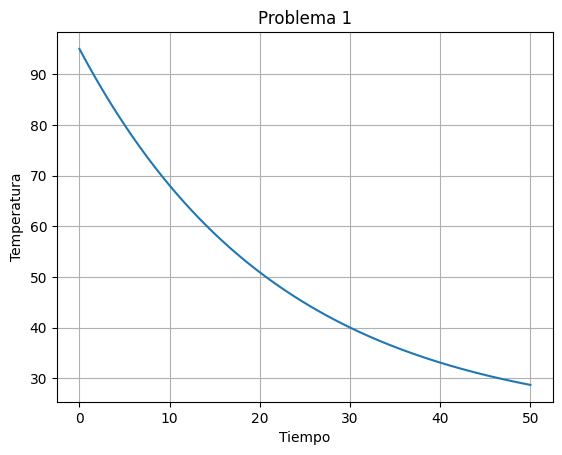

In [6]:
x_vals = np.linspace(0,50,300)
y_sol  = solucion.subs(k, float(k_value[0]))
y_vals = [(y_sol.subs(t,i)).rhs for i in x_vals]

plt.plot(x_vals,y_vals, label='y(t)')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.title('Problema 1')
plt.grid()
plt.show()